# Bank Marketing Predictor
# Noor Fatima (SP23-BAI-046)

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  f1_score,classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_auc_score,precision_score, recall_score

In [92]:
def evaluate_model(name, y_true, y_pred, y_pred_proba):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# XGBoost

In [21]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:44:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [22]:
xgb_predict_tuned = xgb_model.predict(X_test)
xgb_predict_probab_tuned = xgb_model.predict_proba(X_test)[:, 1]

Hyperparameters tuning

In [23]:
# XGBoost Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [24]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
grid_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=cv,
                           verbose=1,
                           n_jobs=-1)


In [26]:
grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:45:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importanc...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [27]:
print(grid_xgb.best_params_)

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


In [28]:
best_model = grid_xgb.best_estimator_

Evaluating Tuned Model

In [32]:
y_predict_tuned = best_model.predict(X_test)
y_predict_probab_tuned = best_model.predict_proba(X_test)[:, 1]

In [33]:
f1_tuned = f1_score(y_test, y_predict_tuned)
print(f'f1 tuned: {f1_tuned}')
auc_tuned = roc_auc_score(y_test, y_predict_probab_tuned)
print(f'AUC-ROC Tuned: {auc_tuned}')

f1 tuned: 0.44021739130434784
AUC-ROC Tuned: 0.8619514068952272


In [34]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_tuned))
print(classification_report(y_test, y_predict_tuned))

Confusion Matrix:
 [[618 183]
 [ 23  81]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86       801
           1       0.31      0.78      0.44       104

    accuracy                           0.77       905
   macro avg       0.64      0.78      0.65       905
weighted avg       0.89      0.77      0.81       905



# Logistic Regression


In [39]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

In [40]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [41]:
logistic_predict = logistic_model.predict(X_test)
logistic_predict_probab = logistic_model.predict_log_proba(X_test)[:, 1]

In [42]:
f1 = f1_score(y_test, logistic_predict)
print("F1-Score:", f1)

F1-Score: 0.43506493506493504


In [43]:
auc = roc_auc_score(y_test, logistic_predict_probab)
print("AUC-ROC:", auc)

AUC-ROC: 0.8236819360414865


Tuning Hyperparameters

In [44]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [45]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [46]:
# GridSearchCV
grid_logistic = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, scoring='f1', cv=cv, n_jobs=-1)
grid_logistic.fit(X_train, y_train)

# RandomizedSearchCV
random_logistic = RandomizedSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, scoring='f1', cv=cv, n_jobs=-1, n_iter=20, random_state=42)
random_logistic.fit(X_train, y_train)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='f1')

In [47]:
grid_logistic = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=cv,
                           verbose=1,
                           n_jobs=-1)


In [48]:
grid_logistic.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [49]:
grid_logistic.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [50]:
best_model = grid_logistic.best_estimator_

In [51]:
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]


In [52]:
f1_tuned = f1_score(y_test, y_pred_tuned)
print("Tuned F1-Score:", f1_tuned)

auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
print("Tuned AUC-ROC:", auc_tuned)

Tuned F1-Score: 0.4258064516129032
Tuned AUC-ROC: 0.8302002304811292


In [53]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88       801
           1       0.32      0.63      0.43       104

    accuracy                           0.80       905
   macro avg       0.63      0.73      0.65       905
weighted avg       0.87      0.80      0.83       905



#Checking importance of features

In [54]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

      Feature  Coefficient
11   duration     1.508620
14   previous     0.171094
13      pdays     0.159356
5     balance     0.051275
10      month     0.029615
15   poutcome    -0.009944
1         job    -0.029858
9         day    -0.031505
0         age    -0.145526
3   education    -0.162328
4     default    -0.470375
12   campaign    -0.538906
2     marital    -0.549888
8     contact    -0.834250
6     housing    -1.610303
7        loan    -1.923632


#Evaluating Models

In [60]:
def evaluate_model(name, y_test, y_predict_tuned):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_predict_tuned))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_predict_probab_tuned))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_tuned))
    print("Classification Report:\n", classification_report(y_test, y_predict_tuned))


evaluate_model("Logistic Regression", y_test, logistic_predict)
evaluate_model("Random Forest", y_test, rf_predictions)
evaluate_model("XGBoost", y_test, xgb_predict_tuned)

--- Logistic Regression ---
Accuracy: 0.8077348066298342
ROC-AUC Score: 0.8619514068952272
Confusion Matrix:
 [[664 137]
 [ 37  67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.88       801
           1       0.33      0.64      0.44       104

    accuracy                           0.81       905
   macro avg       0.64      0.74      0.66       905
weighted avg       0.88      0.81      0.83       905

--- Random Forest ---
Accuracy: 0.7767955801104972
ROC-AUC Score: 0.8619514068952272
Confusion Matrix:
 [[630 171]
 [ 31  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.79      0.86       801
           1       0.30      0.70      0.42       104

    accuracy                           0.78       905
   macro avg       0.63      0.74      0.64       905
weighted avg       0.88      0.78      0.81       905

--- XGBoost ---
Accuracy: 0.7580110497

#Confusion matrixes

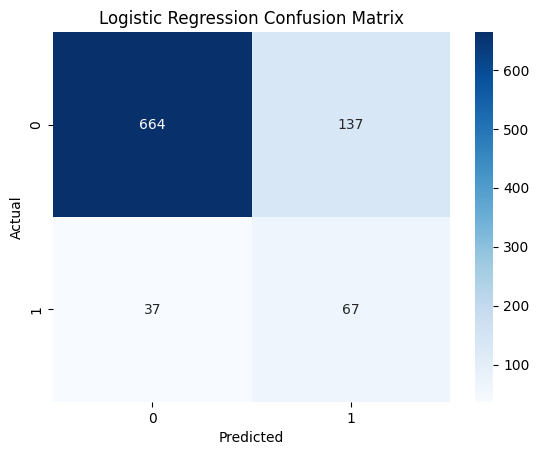

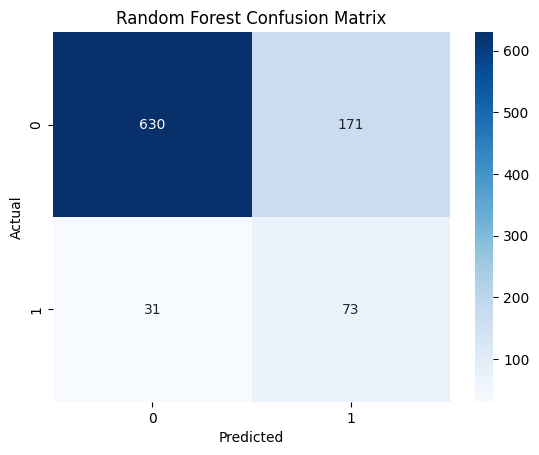

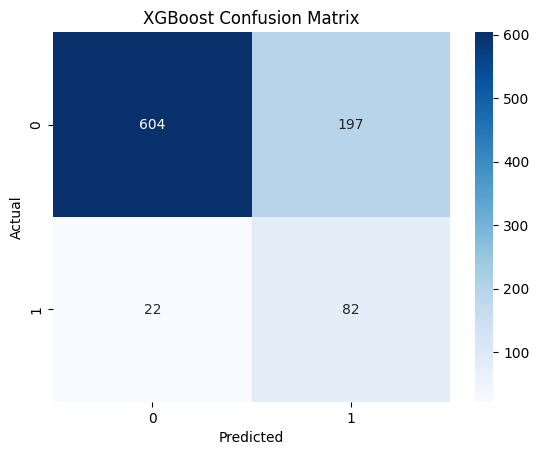

In [62]:
def plot_confusion_matrix(y_test, y_predict_tuned, title):
    cm = confusion_matrix(y_test, y_predict_tuned)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for all three algorithms
plot_confusion_matrix(y_test, logistic_predict, "Logistic Regression Confusion Matrix")
print()
plot_confusion_matrix(y_test, rf_predictions, "Random Forest Confusion Matrix")
print()
plot_confusion_matrix(y_test, xgb_predict_tuned, "XGBoost Confusion Matrix")


#F1 Score,Accuracy, Precision and Recall

In [71]:
logistic_accuracy = accuracy_score(y_test, logistic_predict)
rf_accuracy = accuracy_score(y_test, rf_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predict_tuned)

logistic_f1 = f1_score(y_test, logistic_predict)
rf_f1 = f1_score(y_test, rf_predictions)
xgb_f1 = f1_score(y_test, xgb_predict_tuned)

logistic_precision = precision_score(y_test, logistic_predict)
rf_precision = precision_score(y_test, rf_predictions)
xgb_precision = precision_score(y_test, xgb_predict_tuned)

logistic_recall = recall_score(y_test, logistic_predict)
rf_recall = recall_score(y_test, rf_predictions)
xgb_recall = recall_score(y_test, xgb_predict_tuned)

#Bar chart

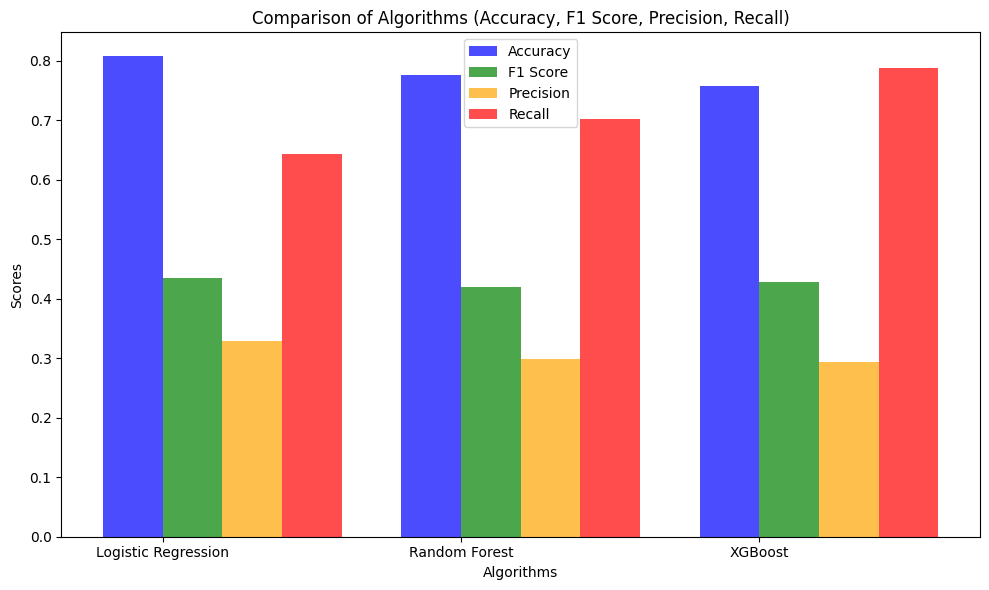

In [74]:
algorithms = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [logistic_accuracy, rf_accuracy, xgb_accuracy]
f1_scores = [logistic_f1, rf_f1, xgb_f1]
precisions = [logistic_precision, rf_precision, xgb_precision]
recalls = [logistic_recall, rf_recall, xgb_recall]

plt.figure(figsize=(10, 6))
bar_width = 0.20
index = range(len(algorithms))


plt.bar(index, accuracies, bar_width, label='Accuracy', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], f1_scores, bar_width, label='F1 Score', color='green', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], precisions, bar_width, label='Precision', color='orange', alpha=0.7)
plt.bar([i + 3 * bar_width for i in index], recalls, bar_width, label='Recall', color='red', alpha=0.7)


# Labels
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Comparison of Algorithms (Accuracy, F1 Score, Precision, Recall)')
plt.xticks([i + bar_width / 2 for i in index], algorithms)
plt.legend()

plt.tight_layout()
plt.show()